In [18]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS


repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)

from src.model import CNN
from src.utils import MNIST, evaluate_loss_acc

In [19]:
DEVICE = 'mps'
CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp1"
num_seeds = 5

In [20]:
# Загружаем данные
_, test_dataset, _, test_loader = MNIST()
criterion = torch.nn.CrossEntropyLoss()


In [22]:
accuracies = []
weights_fc, weights_fc1, weights_fc2 = [], [], []

for seed in range(num_seeds):
    checkpoint_path = os.path.join(CHECKPOINT_DIR, f"model_seed_{seed}.pth")
    
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint {checkpoint_path} not found.")
        continue
    
    model = CNN().to(DEVICE)
    model.load_state_dict(torch.load(checkpoint_path, map_location=DEVICE))
    model.eval()
    
    _, acc = evaluate_loss_acc(test_loader, model, criterion, DEVICE)
    accuracies.append(acc)
    print(f"Seed {seed}: Test Accuracy = {acc:.4f}")
    
    # Сохраняем параметры fc слоев
    weights_fc.append(model.fc.weight.detach().cpu().numpy().flatten())
    weights_fc1.append(model.fc1.weight.detach().cpu().numpy().flatten())
    weights_fc2.append(model.fc2.weight.detach().cpu().numpy().flatten())

# Вычисляем статистику по тестовому accuracy
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
print(f"Mean Test Accuracy: {mean_acc:.4f}, Std: {std_acc:.4f}")

Seed 0: Test Accuracy = 0.9814
Seed 1: Test Accuracy = 0.9790
Seed 2: Test Accuracy = 0.9732
Seed 3: Test Accuracy = 0.9813
Seed 4: Test Accuracy = 0.9789
Mean Test Accuracy: 0.9788, Std: 0.0030


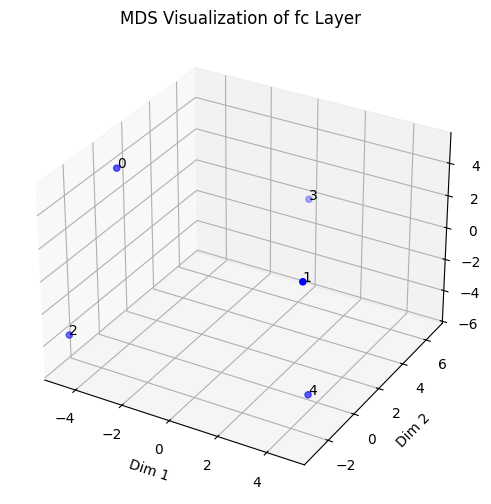

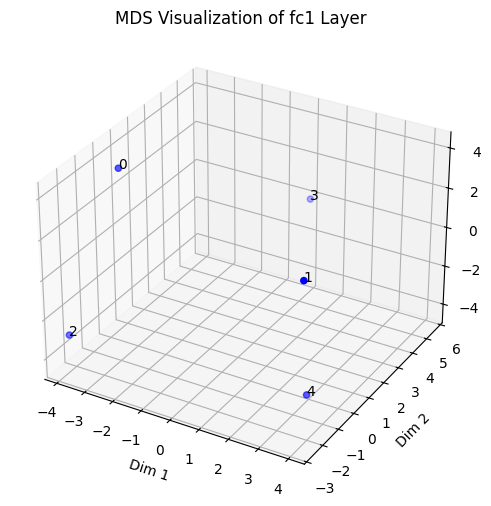

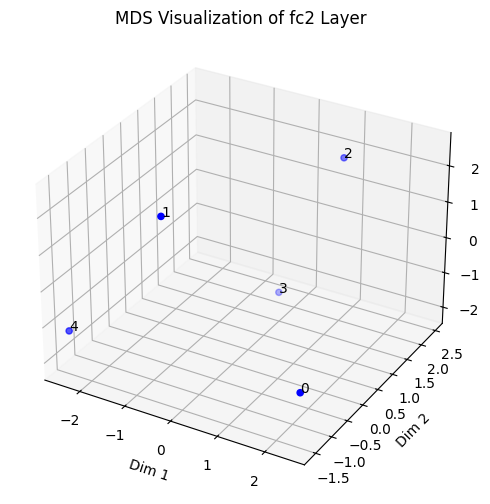

In [23]:
# Функция для визуализации MDS
def plot_mds(weights, title):
    mds = MDS(n_components=3, random_state=42)
    transformed = mds.fit_transform(weights)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c='blue', marker='o')
    
    for i, txt in enumerate(range(len(weights))):
        ax.text(transformed[i, 0], transformed[i, 1], transformed[i, 2], str(txt), fontsize=10)
    
    ax.set_title(title)
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    plt.show()

# Визуализируем MDS для fc слоев
plot_mds(weights_fc, 'MDS Visualization of fc Layer')
plot_mds(weights_fc1, 'MDS Visualization of fc1 Layer')
plot_mds(weights_fc2, 'MDS Visualization of fc2 Layer')
